In [2]:
# model training using tensorflow
import numpy as np
import os
import cv2
from matplotlib import pyplot

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
'''
Configuration Code
'''
def get_n_cores():
    """The NSLOTS variable, If NSLOTS is not defined throw an exception."""
    nslots = os.getenv("NSLOTS")
    if nslots is not None:
        return int(nslots)
    raise ValueError("Environment variable NSLOTS is not defined.")


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

NUM_GPUS = len(tf.config.experimental.list_physical_devices("GPU"))
print("Num GPUs Available: ", NUM_GPUS)
if NUM_GPUS > 0:
    print(os.getenv("CUDA_VISIBLE_DEVICES"))

tf.config.set_soft_device_placement(True)
tf.keras.backend.set_floatx("float32")
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(get_n_cores())

Num GPUs Available:  1
0


In [4]:
batch_size = 32

DATA_DIRECTORY = os.path.join(os.getcwd(), 'data', 'formatted_data')

size = (224,224) # height, width

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=size,
  batch_size=batch_size
)



Found 3000 files belonging to 2 classes.
Using 2400 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=size,
  batch_size=batch_size
)

Found 3000 files belonging to 2 classes.
Using 600 files for validation.


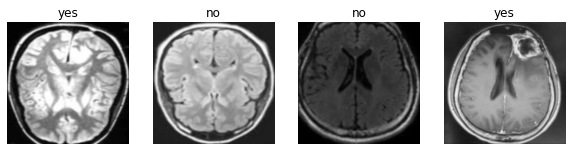

In [6]:
class_names = train_ds.class_names

pyplot.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = pyplot.subplot(1, 4, i + 1)
        pyplot.imshow(images[i].numpy().astype("uint8"))
        pyplot.title(class_names[labels[i]])
        pyplot.axis("off")
pyplot.show()

In [7]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3))

In [14]:
num_classes = 2

model = Sequential([
  normalization_layer,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
75/75 [==============================] - 5s 64ms/step - loss: 4.3984 - accuracy: 0.6654 - val_loss: 0.4088 - val_accuracy: 0.8000
Epoch 2/10
75/75 [==============================] - 3s 47ms/step - loss: 0.3837 - accuracy: 0.8542 - val_loss: 0.3003 - val_accuracy: 0.8750
Epoch 3/10
75/75 [==============================] - 4s 47ms/step - loss: 0.1987 - accuracy: 0.9196 - val_loss: 0.4904 - val_accuracy: 0.8050
Epoch 4/10
75/75 [==============================] - 4s 50ms/step - loss: 0.1443 - accuracy: 0.9438 - val_loss: 0.2167 - val_accuracy: 0.9117
Epoch 5/10
75/75 [==============================] - 4s 49ms/step - loss: 0.0587 - accuracy: 0.9842 - val_loss: 0.2128 - val_accuracy: 0.9233
Epoch 6/10
75/75 [==============================] - 4s 52ms/step - loss: 0.0408 - accuracy: 0.9908 - val_loss: 0.1808 - val_accuracy: 0.9400
Epoch 7/10
75/75 [==============================] - 4s 53ms/step - loss: 0.0272 - accuracy: 0.9954 - val_loss: 0.1518 - val_accuracy: 0.9467
Epoch 8/10
75

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               25690240  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 25,690,946
Trainable params: 25,690,946
Non-trainable params: 0
__________________________________________

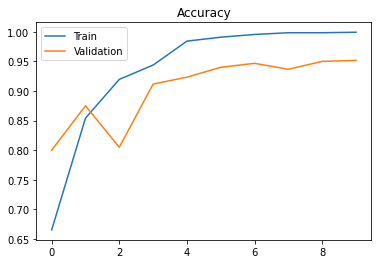

In [18]:
'''
Plot the accuracy
'''
pyplot.title("Accuracy")
pyplot.plot(range(epochs), history.history['accuracy'], label = "Train")
pyplot.plot(range(epochs), history.history['val_accuracy'], label = "Validation")
pyplot.legend()
pyplot.show()

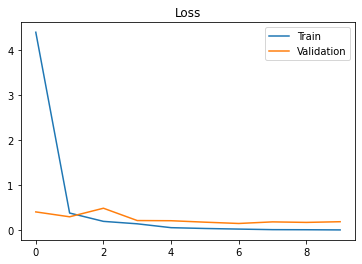

In [19]:
'''
Plot the loss
'''
pyplot.title("Loss")
pyplot.plot(range(epochs), history.history['loss'], label = "Train")
pyplot.plot(range(epochs), history.history['val_loss'], label = "Validation")
pyplot.legend()
pyplot.show()

In [20]:
model.save('models/model_tf_100_no-aug-1l')

INFO:tensorflow:Assets written to: models/model_tf_100_no-aug-1l/assets
